## <font color="orange"><b>Ecuaciones diferenciales ordinarias de orden superior</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">

<b>Nota</b>: <i>En la unidad anterior vimos que las ecuaciones diferenciales de primer orden se pueden usar para modelar una variedad de situaciones físicas. Sin embargo, muchas situaciones físicas necesitan ser modelado por ecuaciones diferenciales de orden superior (no es posible avanzar mucho en el análisis de mecánica de fluidos, transferencia de calor, vibraciones mecánicas o fenómenos electromagnéticos sin darse cuenta que es necesario resolver ED lineales de segundo orden). En esta unidad, discutimos varios métodos para resolver ecuaciones diferenciales de orden superior.</i>

</font>
</div>

*    <font color="gren"><b>Definiciones preliminares y notación</b></font>

*    <font color="gren"><b>EDO homogéneas con coeficientes constantes</b></font>

*    <font color="gren"><b>EDO no homogéneas con coeficientes constantes</b></font>

*    <font color="gren"><b>Ecuación de Cauchy-Euler</b></font>

*    <font color="gren"><b>Soluciones en serie</b></font>

*    <font color="gren"><b>EDO no lineales</b></font>

### <font color="gren"><b>Definiciones preliminares y notación</b></font>

#### <font color="cyan"><b>Introducción</b></font>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>La <b>ecuación de Van-der-Pol</b>, que surge en el estudio del amortiguamiento no lineal, es una EDO de segundo orden no lineal</i>

\begin{equation*}
	\frac{d^2 x}{dt^2} + \mu(x^2 - 1)\frac{dx}{dt} + x = 0
\end{equation*}

<i>Si $x(0) = 1$ y $x'(0) = 0$ grafique la solución de la ecuación de Van-der-Pol en el intervalo $[0, 15]$ para $\mu = 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4$ y $8$. Compare le gráfica de la solución con la gráfica de la solución  de un oscilador simple no amortiguado, $x'' + x = 0$ con $x(0) = 1$ y $x'(0) = 0$</i>

</font>
</div>

<b>Solución:</b>

<i>Resolveremos el problema con la ayuda de Wolfram Language:</i>

In [1]:
(*Definiremos primero la función vanderpol*)
vanderpol[mu_] := NDSolve[{x''[t] + mu*(x[t]^2 - 1)*x'[t] + x[t] == 0, x[0] == 1, x'[0] ==0}, x[t], {t,0,15}]

{{x[t] -> InterpolatingFunction[{{0., 15.}}, <>][t]}}
-Graphics-
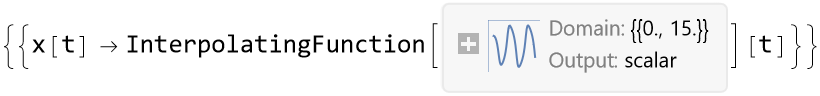
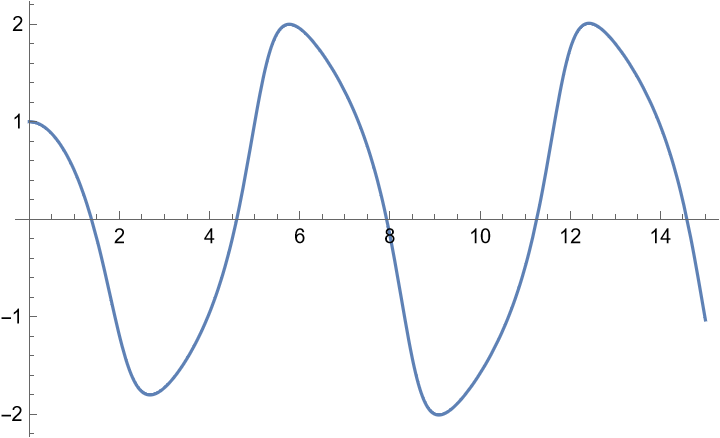

In [3]:
(*Grafiquemos la función vanderpol para un valor de m, por ejemplo mu=1*)
solnum1 = vanderpol[1]   (*Primero evaluamos la función con m=1*)
Plot[x[t]/.solnum1, {t, 0, 15}]   (*Ahora graficamos en el intervalo dado*)

In [6]:
(*Con este resultado podemos evaluar la función en cualquier punto, por ejemplo t=1*)
solnum1/.t->1

{{x[1] -> 0.497616}}

-Graphics-
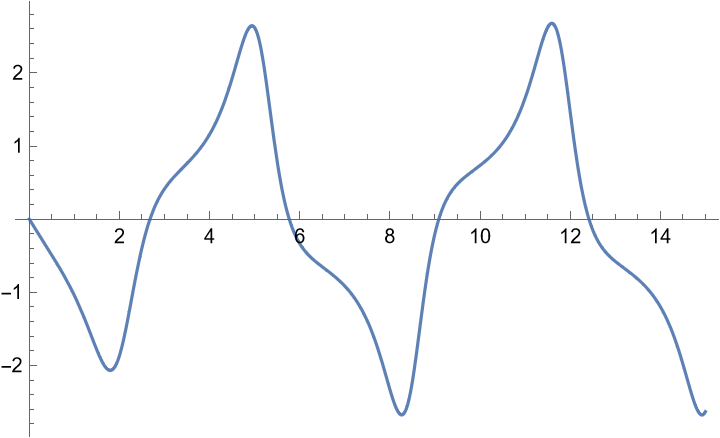

In [8]:
(*Podemos obtener la gráfica de su derivada*)
Plot[Evaluate[D[solnum1[[1, 1, 2]], t]], {t, 0, 15}]

In [10]:
solgraph[mu_] := Module[{solnum}, solnum = vanderpol[mu];
Plot[x[t]/.solnum, {t, 0, 15}, PlotLabels->mu, PlotRange -> {-3, 3}, Ticks -> {{0, 15}, {-3, 3}}, DisplayFunction -> $DisplayFunction]]

-Graphics-
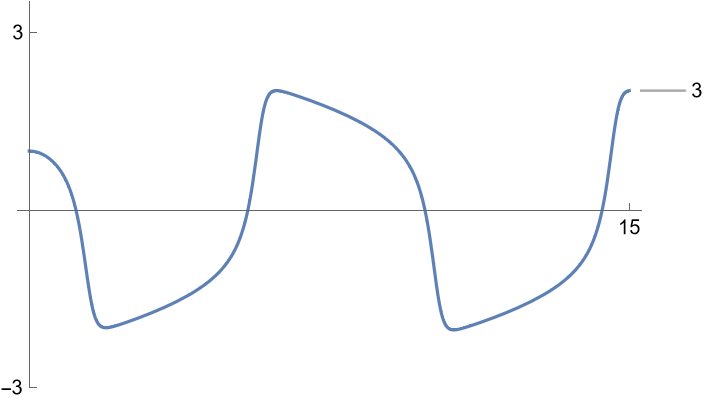

In [11]:
solgraph[3]

In [12]:
muvals = {1/16, 1/8, 1/4, 1/2, 1, 2};
graphs = Map[solgraph, muvals];
toshow = Partition[graphs, 3];

-Graphics-
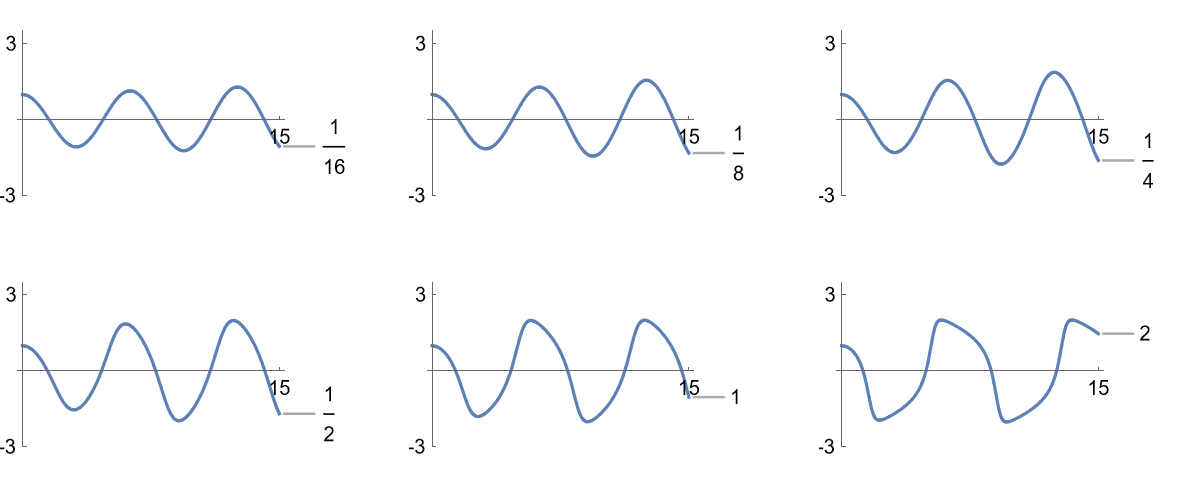

In [15]:
Show[GraphicsGrid[toshow]]

In [16]:
exactsol = DSolve[{x''[t] + x[t] == 0, x[0] == 1, x'[0] == 0}, x[t], t]

{{x[t] -> Cos[t]}}

-Graphics-
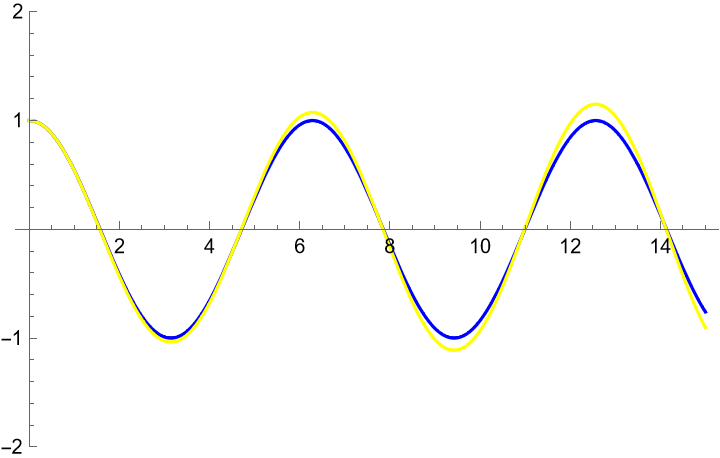

In [17]:
sol2 = vanderpol[1/32];
Plot[Evaluate[x[t]/.{exactsol, sol2}], {t, 0, 15}, PlotStyle -> {Blue, Yellow}, PlotRange -> {-2, 2}]

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>Este ejemplo ilustra una importante diferencia entre ED lineales y no lineales.</i>
    
> Soluciones exactas para ED lineales con coeficientes constantes se pueden obtener.
    
> ED no lineales puede ser aproximadas por ED lineales.
    
</font>
</div>

#### <font color="cyan"><b>EDO lineales de orden $n$</b></font>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición</b>: <i>Una ecuación diferencial ordinaria (de orden $n$) es <b>lineal</b> si es de la forma:</i>

\begin{equation}\label{eq:eqd_l1}
	a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y + f(x) = 0 
\end{equation}

<i>donde las funciones $a_i(x),\, i = 0, 1, \dots, n$, y $f(x)$ están dados y $a_n(x)$ no es idénticamente cero.</i>
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
* <i>Si $f(x) = 0$, la ecuación (\ref{eq:eqd_l1}) es llamada <b>homogénea</b>.</i>
    
    
* <i>Si $f(x) \neq 0$, la ecuación (\ref{eq:eqd_l1}) es llamada <b>no homogénea</b>.</i>
    
    
* <i>Si las funciones $a_i(x),\, i = 0, 1, \dots, n$ son constantes, la ecuación (\ref{eq:eqd_l1}) es llamada <b>EDO lineal con coeficientes constantes</b>.</i>
 
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema (Existencia y Unicidad)</b>: <i>Si las funciones $a_n(x), a_{n-1}(x), \dots, a_1(x), a_0(x)$ y $f(x)$ son continuas en un intervalo $I$ y $a_n(x) \neq 0$ para toda $x$ en el intervalo $I$, entonces para cada $x_0 \in I$ hay una única solución del problema con valores iniciales en $I$</i>

\begin{equation}
	\left\{a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y + f(x) = 0 \atop
	y(x_0) = y_0, \,\ y'(x_0) = y'_0, \,\ y''(x_0) = y''_0, \,\dots, \,\ y^{(n-1)}(x_0) = y^{(n-1)}_0
	\right.
\end{equation}

<i>donde $y_0, y'_0, y''_0, \dots, y^{(n-1)}_0$ representan constantes arbitrarias</i>
    
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>El teorema no se puede aplicar a un problema con condiciones de frontera</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Dependencia Lineal y Funciones Linealmente Independientes)</b>: <i>Sea $S = \{f_1(x), f_2(x), \dots, f_n(x)\}$ un conjunto de funciones. $S$ es <b>linealmente dependiente</b> en un intervalo $I$ si hay constantes $c_1, c_2, \dots, c_n,$ no todas cero, tal que</i>

\begin{equation*}
	c_1 f_1(x) + c_2 f_2(x) + \cdots + c_n f_n(x) = 0
\end{equation*}

<i>para cualquier valor de $x$ en el intervalo $I$. $S$ es <b>linealmente independiente</b> si $S$ no es linealmente dependiente.</i>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Wronskiano)</b>: <i>Sea $S = \{f_1(x), f_2(x), \dots, f_n(x)\}$ un conjunto de $n$ funciones donde cada una es diferenciable al menos $n-1$ veces. El <b>Wronskiano</b> de $S$, esta dado por</i>
    
\begin{equation*}
    W(S) = W(\{f_1(x), f_2(x), \dots, f_n(x)\}) =
    \begin{vmatrix}
    f_1(x) & f_2(x) & \cdots & f_n(x) \\
    f'_1(x) & f'_2(x) & \cdots & f'_n(x) \\
    \vdots & \vdots & \vdots & \vdots \\
    f^{(n-1)}_1(x) & f^{(n-1)}_2(x) & \cdots & f^{(n-1)}_n(x) \\
    \end{vmatrix}
\end{equation*}
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Cálcule el Wronskiano de los siguientes conjuntos de funciones: (a) $S = \{\sin(x), \cos(x)\}$ y (b) $S = \{\cos(2x), \sin(2x), \sin(x)\cos(x)\}$</i>
    
<b>Solución</b>: <i>Primero obtendremos el Wronskiano del conjunto de funciones del inciso (a): $S = \{\sin(x), \cos(x)\}$</i>
    
\begin{equation*}
    W(S) =
    \begin{vmatrix}
        \sin(x) & \cos(x) \\
        \cos(x) & -\sin(x) \\
    \end{vmatrix}
    = -\sin^2(x) -\cos^2(x) = -1 
\end{equation*}
    
<i>Para el inciso (b): $S = \{\cos(2x), \sin(2x), \sin(x)\cos(x)\}$, realizaremos el cálculo con Wolfram Langauge</i>
    
</font>
</div>

In [19]:
Wronskian[{Sin[2*x], Cos[2*x], Sin[x]*Cos[x]}, x]

0

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>:

> <i>En el ejemplo anterior vemos que en el inciso (a) el Wronskiano no es $0$, mientras que en el inciso (b) es $0$</i>

> <i>Ademas el conjunto de funciones del inciso (a) es linealmente independiente, mientras que el conjunto de funciones del inciso (b) es linealmente dependiente</i>

> <i>Veremos que podemos utilizar el Wronskiano para determinar si un conjunto de funciones es linealmente dependiente o linealmente independiente .</i>
    
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Sea $S = \{f_1(x), f_2(x), \dots, f_n(x)\}$ un conjunto de $n$ soluciones de la ecuación (\ref{eq:eqd_l1}), una EDO lineal de orden $n$, en un intervalo $I$. $S$ es linealmente independiente si y solo si $W(S) \neq 0$ para almenos un valor de $x$ en el intervalo $I$.</i>
        
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Utilice el Wronskiano para clasificar el siguiente conjunto de funciones como linealmente independientes o linealmente dependientes: (a) $S = \{1 - 2\sin^2(x), \cos(2x)\}$ y (b) $S = \{e^x, x e^x, x^2 e^x\}$</i>

<b>Solución</b>: <i>(a) Note que el conjunto de funciones $S$ son soluciones de $y'' + 4 y = 0$. Calculemos entonces el Wronskiano de estas funciones</i>

\begin{equation*}
	W(S) =
	\begin{vmatrix}
		1 - 2\sin^2(x) & \cos(2x) \\
		-4\sin(x)\cos(x) & -2\sin(2x) \\
	\end{vmatrix}
	= -2\sin(2x)[1 - 2\sin^2(x)] + 4\sin(x)\cos(x)\cos(2x) \\ = 0 
\end{equation*}

<i>Para el inciso (b), observe que las funciones del conjunto $S$ son soluciones de $y''' - 3y'' + 3y' - y=0$. Aquí utilizaremos Wolfram para obtener el Wronskiano.</i>
    
</font>
</div>

In [20]:
Wronskian[{Exp[x], x Exp[x], x^2 Exp[x]}, x]

3 x
2 E

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Concluimos que el conjunto de funciones del inciso (a) son linealmente dependientes, mientras que las del inciso (b) son linealmente independientes.</i>
    
</font>
</div>

#### <font color="cyan"><b>Conjunto fundamental de soluciones</b></font>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Conjunto Fundamental de Soluciones)</b>: <i>Un conjunto $S$ de $n$ soluciones no triviales linealmente independientes de una EDO de orden $n$, lineal y homogénea es llamado <b>conjunto fundamental de soluciones</b> de la ecuación.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Probar que $S = \{e^{-5x}, e^{-x}\}$ es un conjunto fundamental de soluciones de la ecuación $y'' + 6y' + 5y = 0$</i>

<b>Solución</b>: <i>Dado que</i>

\begin{equation*}
	\frac{d^2 e^{-5x}}{dx^2} + 6 \frac{d e^{-5x}}{dx} + 5 e^{-5x} = 25 e^{-5x} - 30 e^{-5x} + 5 e^{-5x} = 0
\end{equation*}
y
\begin{equation*}
	\frac{d^2 e^{-x}}{dx^2} + 6 \frac{d e^{-x}}{dx} + 5 e^{-x} = e^{-x} - 6 e^{-x} + 5 e^{-x} = 0
\end{equation*}

<i>entonces, cada función es una solución de la ecuación diferencial.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Ademas $S$ es linealmente independiente porque:</i>
    
</font>
</div>

In [21]:
Wronskian[{Exp[-5 x], Exp[-x]}, x]

4
----
 6 x
E

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema (Principio de Superposición)</b>: <i>Si $S = \{f_1(x), f_2(x), \dots, f_k(x)\}$ es un conjunto de soluciones de la EDO de orden $n$, lineal y homogénea y $\{c_1, c_2, \dots, c_k\}$ es un conjunto de $k$ constantes, entonces</i>

\begin{equation*}
	f(x) = c_1 f_1(x) + c_2 f_2(x) + \cdots + c_k f_k(x)
\end{equation*}

<i>es también una solución de la ecuación. $f(x)$ es llamada <b>combinación lineal de funciones</b> el conjunto $S$.<i/>
    
</font>
</div>

<div class="alert alert-block alert-info">
<font color="blue" face="Ginebra">
    
<b>Definición (Solución General)</b>: <i>Si $S = \{y_1(x), y_2(x), \dots, y_n(x)\}$ es un conjunto fundamental de soluciones de la EDO de orden $n$, lineal y homogénea </i>

\begin{equation}\label{eq:edo_lh}
	a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y = 0
\end{equation}

<i>entonces la solución general de la ecuación es<i/>

\begin{equation*}
	f(x) = c_1 y_1(x) + c_2 y_2(x) + \cdots + c_n y_n(x)
\end{equation*}

<i>donde $\{c_1, c_2, \dots, c_n\}$ es un conjunto de $n$ constantes arbitrarias.<i/>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<i>Continuando con el ejemplo anterior, ya probamos que $S = \{e^{-5x}, e^{-x}\}$ es un conjunto fundamental de soluciones de la ecuación $y'' + 6y' + 5y = 0$. Entonces por el teorema de solución general, tenemos que:</i>

\begin{equation*}
	f(x) = c_1 e^{-5x} + c_2 e^{-x}
\end{equation*}

<i>es la solución general de la ecuación $y'' + 6y' + 5y = 0$, en efecto:</i>

\begin{eqnarray*}
	\frac{d^2 f(x)}{dx^2} + 6 \frac{d f(x)}{dx} + 5 f(x)
	&=& \frac{d^2 (c_1 e^{-5x} + c_2 e^{-x})}{dx^2} + 6 \frac{d (c_1 e^{-5x} + c_2 e^{-x})}{dx} + 5 (c_1 e^{-5x} + c_2 e^{-x}) \\
	&=& 25c_1 e^{-5x} + c_2 e^{-x} - 30c_1 e^{-5x} - 6c_2 e^{-x} + 5c_1 e^{-5x} + 5c_2 e^{-x} \\
	&=& c_1\big(25 e^{-5x} - 30 e^{-5x} + 5 e^{-5x} \big) + c_2\big( e^{-x} - 6 e^{-x} + 5 e^{-x} \big) = 0
\end{eqnarray*}
    
</font>
</div>

#### <font color="cyan"><b>Existencia de un conjunto fundamental de soluciones</b></font>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Si $a_i(x)$ es continua en un intervalo abierto $I$ para $i = 0, 1, \dots, n$, y $a_n(x) \neq 0$ para todo $x$ en el intervalo $I$ entonces la EDO de orden $n$, lineal y homogénea (\ref{eq:edo_lh})</i>

\begin{equation*}
	a_n(x)y^{(n)} + a_{n-1}(x)y^{(n-1)} + \cdots + a_1(x)y' + a_0(x)y = 0
\end{equation*}

<i>tiene un conjunto fundamental de $n$ soluciones.<i/>
        
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Cualquier conjunto de $n+1$ soluciones de una EDO de orden $n$, lineal y homogénea (\ref{eq:edo_lh}) es linealmente dependiente.</i>
        
</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>El resultado de estos dos teoremas se puede resumir dciendo que para resolvera EDO de orden $n$, lineal y homogénea, debemos encontrar un conjunto $S$ de $n$ funciones que satisfacen la ecuación diferencial (\ref{eq:edo_lh}), tal que $W(S) \neq 0$.</i>
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Probar que $y = e^{-x}(c_1 \cos(4x) + c_2\sin(4x))$ es una solución general de $y'' + 2y' + 17y = 0$.</i>

<b>Solución</b>: <i>Utilizaremos Wolfram Language para probar lo que se pide, primero utilizaremos el comando DSolve para obtener la solución de la ED, después obtendremos el Wronskiano de $\cos(4x), \sin(4x)$ y veremos que en efecto es diferente de cero.</i>
    
</font>
</div>

C[2] Cos[4 x]   C[1] Sin[4 x]
{{y[x] -> ------------- + -------------}}
                x               x
               E               E
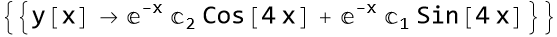

In [22]:
DSolve[y''[x] + 2 y'[x] + 17 y[x] == 0, y[x], x]

In [23]:
Wronskian[{Cos[4 x], Sin[4 x]}, x]

4

#### <font color="cyan"><b>Reducción de orden</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<b>Nota</b>: <i>En ciertas ocasiones, podemos reducir una ecuación de segundo orden mediante una apropiada sustitución a una de primer orden. Considere la ecuación</i>

\begin{equation*}
	y'' + p(x)y' + q(x)y = 0
\end{equation*}

<i>y suponga que $y_1 = f(x)$ es una solución de esta ecuación. De los temas vistos anteriormente, sabemos que esta ecuación tiene dos solucione linealmente independientes. Entonces, vamos a determinar una segunda solución linealmente independiente, proponemos una solución de la siguiente forma</i>

\begin{equation*}
	y_2 = \nu(x)f(x)
\end{equation*}

<i>donde $\nu(x)$ no es una función constante. Diferenciamos la función $y_2$ dos veces, obtenemos</i>

\begin{equation*}
	y'_2 = \nu'(x)f(x) + \nu(x)f'(x) \quad\text{y}\quad\ y''_2 = \nu''(x)f(x) + 2\nu'(x)f'(x) + \nu(x)f''(x).
\end{equation*}

</font>
</div>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Sustituyendo en la ecuación diferencial, tenemos</i>

\begin{eqnarray*}
	y'' + p(x)y' + q(x)y &=& \nu''f + 2\nu'f' + \nu f'' + p(x)\big(\nu'f + \nu f'\big) + q(x)\nu f \\
	&=& f\nu'' + \big(2f' + p(x)f\big)\nu' + \nu\big(f'' + p(x)f' + q(x)f\big) \\
	&=& f\nu'' + \big(2f' + p(x)f\big)\nu' = 0
\end{eqnarray*}

<i>Observe que la ecuación final resultante se puede reducir a una EDO de primer orden mediante el cambio de variable $\omega = \nu'$, es decir, finalmente obtenemos</i>

\begin{equation*}
	f\omega' + \big(2f' + p(x)f\big)\omega = 0
\end{equation*}

<i>La cual resulta ser una ecuación de variables separables</i>

\begin{equation*}
	\frac{1}{\omega}d\omega = \left(-2\frac{f'}{f} - p(x)\right)dx \quad\Rightarrow\quad\ \omega = \frac{1}{f^2}e^{-\int p(x)dx}
\end{equation*}

<i>Recordando que $\omega = \nu'$ y $y_1(x) = f(x)$, obtenemos</i>

\begin{equation*}
	\nu(x) = \int \frac{1}{\big[y_1(x)\big]^2}e^{-\int p(x)dx} dx \quad\Rightarrow\quad\ y_2(x) = y_1(x)\int \frac{1}{\big[y_1(x)\big]^2}e^{-\int p(x)dx} dx
\end{equation*}
    
</font>
</div>

<div class="alert alert-block alert-danger">
<font color="purple" face="Ginebra">
    
<b>Ejemplo</b>: <i>Determine una segunda solución linealmente independiente para la ecuación $4x^2 y'' + 8xy' + y = 0,\,\ x > 0$, dado que $y_1(x) = \frac{1}{\sqrt{x}}$ es una solución</i>

<b>Solución</b>: <i>Primero dividimos la ecuación entre $4x^2$ para obtener una ecuación de la forma $y'' + p(x)y' + q(x)y = 0$. Esto nos lleva a la ecuación</i>

\begin{equation*}
	y'' + \frac{2}{x}y' + \frac{1}{x^2}y = 0
\end{equation*}

<i>Observamos que para esta ecuación tenemos: $p(x) = \frac{2}{x}$ y $y_1(x) = x^{-1/2}$. Aplicando las formulas obtenidas anteriormente para $\nu$ y $y_2$ se tiene</i>

\begin{equation*}
	\nu(x) = \int \frac{1}{\big[y_1(x)\big]^2}e^{-\int p(x)dx} dx = \int \frac{1}{\big[x^{-1/2}\big]^2}e^{-\int \frac{2}{x}dx} dx = \int x e^{-2 \ln(x)}dx = \int \frac{1}{x}dx = \ln(x)
\end{equation*}
<i>y</i>
\begin{equation*}
	y_2(x) = \nu(x)y_1(x) = \ln(x)x^{-1/2} = \frac{\ln(x)}{\sqrt{x}}
\end{equation*}
    
</font>
</div>

### <font color="gren"><b>EDO homogéneas con coeficientes constantes</b></font>

#### <font color="cyan"><b>Ecuaciones de segundo orden</b></font>

<div class="alert alert-block alert-warning">
<font color="grey" face="Ginebra">
    
<i>Suponga que los coeficientes de la ecuación $a_2(t)y''+ a_1(t)y' + a_0(t)y = f(t)$ son constantes: $a_2(t) = a, a_1(t) = b \text{ y } a_0(t) = c$ y suponga ademas que $f(t) = 0$. En este caso, se tiene la ecuación</i>

\begin{equation}\label{eq:edo2_lnc}
	ay''+ by' + cy = 0.
\end{equation}

<i>Ahora suponemos que $y = e^{kt}$, $k = cte$, es una solución de la ecuación (\ref{eq:edo2_lnc}). Entonces, $y' = ke^{kt}$ y $y'' = k^2e^{kt}$, sustituyendo esto en la ecuación (\ref{eq:edo2_lnc}) se tiene</i>

\begin{equation*}
	ay'' + by' + cy =  ak^2e^{kt} + bke^{kt} + ce^{kt} = e^{kt}\big(ak^2 + bk + c\big) = 0.
\end{equation*}

<i>Debido a que $e^{kt} \neq 0$, entonces la solución de la ecuación (\ref{eq:edo2_lnc}) esta determinada por la solución de</i>

\begin{equation}\label{eq:ec}
	ak^2 + bk + c = 0.
\end{equation}

<i>llamada <b>ecuación característica</b> de l ecuación (\ref{eq:edo2_lnc})</i>
    
</font>
</div>

<div class="alert alert-block alert-success">
<font color="green" face="Ginebra">
    
<b>Teorema</b>: <i>Sea $k_1$ y $k_2$ las soluciones de la ecuación caracteristica (\ref{eq:ec}).</i>
    
> <i>Si $k_1 \neq k_2$ y son reales, las dos soluciones linelamente independientes de la ecuacion (\ref{eq:edo_lhc}) son: $y_1 = e^{k_1 t}$ y $y_2 = e^{k_2 t}$, por lo que la solución general de la ecuacion (\ref{eq:edo_lhc}) es</i>
    
</font>
</div>

### <font color="gren"><b>EDO no homogéneas con coeficientes constantes</b></font>

### <font color="gren"><b>Ecuación de Cauchy-Euler</b></font>

### <font color="gren"><b>Soluciones en serie</b></font>

### <font color="gren"><b>EDO no lineales</b></font>